### Import the required libraries -

In [20]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2DTranspose, Conv2D, UpSampling2D, MaxPooling2D
from tensorflow.keras import regularizers, Input, Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

### Define the encoding/decoding model -

In [22]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


### Prepare the training/testing dataset -

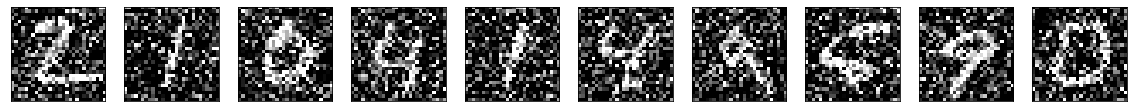

In [23]:
# Load the mnist data and normalize the values.
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Train the model -

In [26]:
# Train the model for 50 epochs with a batch size of 256
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1268 - val_loss: 0.1083
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1073 - val_loss: 0.1046
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1047 - val_loss: 0.1034
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1033 - val_loss: 0.1017
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1022 - val_loss: 0.1011
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1014 - val_loss: 0.1000
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1007 - val_loss: 0.0994
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1001 - val_loss: 0.0990
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0996 - val_loss: 0.0988
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0991 - val_lo

### Evaluate the model and visualize results -

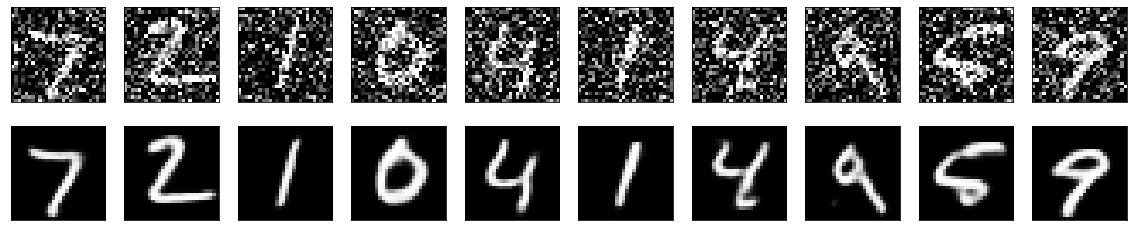

In [32]:
# Evaluate the model using test data
results = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(results[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()